In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Prepare a color palette, useful later
sns.set_theme(palette='flare', style='darkgrid')
palette = []
for color in mcolors.TABLEAU_COLORS.values():
      palette.append(color)

def moving_average(series, w):
    retv = np.cumsum(series)
    retv[w:] = retv[w:] - retv[:-w]
    return retv[w - 1:] / w

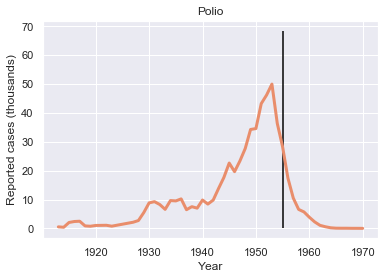

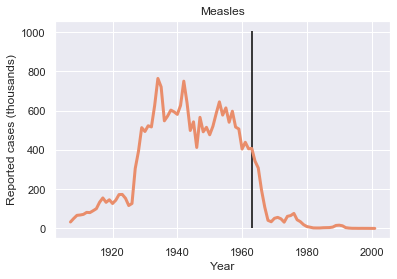

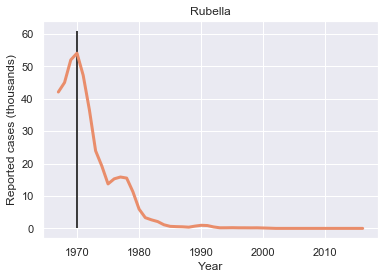

In [64]:
filenames       = ["polio.csv", "measles.csv",  "rubella.csv"]
disease_strings = ["Polio",     "Measles",      "Rubella"]
vaccine_years   = [1955,        1963,           1970]

for filename, disease_string, vaccine_year in zip(filenames, disease_strings, vaccine_years):
    data    = pd.read_csv(filename, usecols=['Fatalities', 'PeriodStartDate', 'PeriodEndDate',
       'PartOfCumulativeCountSeries','CountValue'])
    data    = data[data['Fatalities']==0]

    parsed  = data[data['PartOfCumulativeCountSeries']==0].copy()
    parsed.PeriodEndDate = data[data['PartOfCumulativeCountSeries']==0].PeriodEndDate.apply(lambda x: int(x[0:4]))
    parsed = parsed.groupby(by=['PeriodEndDate']).CountValue.sum()/1000

    parsed_cumulative = data[data['PartOfCumulativeCountSeries']==1].copy()
    parsed_cumulative.PeriodEndDate = data[data['PartOfCumulativeCountSeries']==1].PeriodEndDate.apply(lambda x: int(x[0:4]))
    parsed_cumulative = parsed_cumulative.groupby(by=['PeriodEndDate']).CountValue.max()/1000

    parsed_total = parsed.add(parsed_cumulative, fill_value=0)

    plt.plot(parsed_total.index.to_numpy()[1:-1], moving_average(parsed_total.to_numpy(), 3), linewidth=3)
    plt.vlines(vaccine_year, 0, parsed_total.max())
    plt.title(disease_string)
    plt.xlabel("Year")
    plt.ylabel("Reported cases (thousands)")
    plt.show()